<a href="https://colab.research.google.com/github/SIMMAVONG/SIMMAVONG/blob/main/%E0%B8%AA%E0%B8%B3%E0%B9%80%E0%B8%99%E0%B8%B2%E0%B8%82%E0%B8%AD%E0%B8%87_juventus2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# conda install beautifulsoup4 lxml requests pillow
import pandas as pd
import requests
import bs4
from bs4 import BeautifulSoup
from PIL import Image # pillow package (Python Image Library)
import io

In [ ]:
print(f'pandas version = {pd.__version__}')
print(f'bs4    version = {bs4.__version__}') # beautifulsoup4

pandas version = 1.3.5
bs4    version = 4.6.3


In [ ]:
pd.Timestamp.today()

Timestamp('2022-05-17 02:18:13.446155')

In [ ]:
url='https://www.juventus.com/en/teams/first-team-men/squad/'
#url='https://www.manutd.com/en/players-and-staff/first-team'
#url='https://www.evertonfc.com/teams/men'
# url='https://www.manutd.com/en/players-and-staff/legends'
#url='https://www.tottenhamhotspur.com/teams/men/players'
#url='https://www.liverpoolfc.com/team/first-team'
r=requests.get(url)
r.text[:100]

'\n\n\n\n\n<!DOCTYPE html>\n\n<html lang="en" data-culture="en-GB" dir="ltr">\n<head>\n  <meta charset="utf-8"'

In [ ]:
# s = BeautifulSoup(r.text, 'html.parser')
s = BeautifulSoup(r.text, 'lxml')
type(s)

bs4.BeautifulSoup

In [ ]:
print(s.prettify())

<!DOCTYPE html>
<html data-culture="en-GB" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="https://www.juventus.com/images/image/upload/f_auto/dev/assets/icons/16x16" rel="icon" sizes="16x16" type="image/png"/>
  <link href="https://www.juventus.com/images/image/upload/f_auto/dev/assets/icons/32x32" rel="icon" sizes="32x32" type="image/png"/>
  <link href="https://www.juventus.com/images/image/upload/f_auto/dev/assets/icons/48x48" rel="icon" sizes="48x48" type="image/png"/>
  <link href="https://www.juventus.com/images/image/upload/f_auto/dev/assets/icons/64x64" rel="icon" sizes="64x64" type="image/png"/>
  <link href="https://www.juventus.com/images/image/upload/f_auto/dev/assets/icons/128x128" rel="icon" sizes="128x128" type="image/png"/>
  <link as="font" crossorigin="" href="/assets/fonts/JuventusFans/JuventusFans--bold.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigi

In [ ]:
#members = s.select('li.team-player-list-item') 
members = s.find_all('div', {'class':'jcom-player-item swiper-slide'})

In [ ]:
len(members)

25

In [ ]:
members[0]

<div class="jcom-player-item swiper-slide">
<a alt="Wojciech Szczęsny" aria-label="Wojciech Szczęsny" href="/en/teams/first-team-men/squad/wojciech-szczesny" title="Wojciech Szczęsny">
<picture class="d3-o-media-object__picture"><!--[if IE 9]><video style="display: none; "><![endif]--><source media="(min-width:1024px)" srcset="https://www.juventus.com/images/image/private/t_portrait_tablet_desktop/f_png/dev/rqbbkxbmfw56dznmhkgi.png 1x, https://www.juventus.com/images/image/private/t_portrait_tablet_desktop_2x/f_png/dev/rqbbkxbmfw56dznmhkgi.png 2x, https://www.juventus.com/images/image/private/t_portrait_tablet_desktop_3x/f_png/dev/rqbbkxbmfw56dznmhkgi.png 3x"/><source media="(min-width:768px)" srcset="https://www.juventus.com/images/image/private/t_portrait_tablet_desktop/f_png/dev/rqbbkxbmfw56dznmhkgi.png 1x, https://www.juventus.com/images/image/private/t_portrait_tablet_desktop_2x/f_png/dev/rqbbkxbmfw56dznmhkgi.png 2x, https://www.juventus.com/images/image/private/t_portrait_tablet_

In [ ]:
print(members[0].prettify())

<div class="jcom-player-item swiper-slide">
 <a alt="Wojciech Szczęsny" aria-label="Wojciech Szczęsny" href="/en/teams/first-team-men/squad/wojciech-szczesny" title="Wojciech Szczęsny">
  <picture class="d3-o-media-object__picture">
   <!--[if IE 9]><video style="display: none; "><![endif]-->
   <source media="(min-width:1024px)" srcset="https://www.juventus.com/images/image/private/t_portrait_tablet_desktop/f_png/dev/rqbbkxbmfw56dznmhkgi.png 1x, https://www.juventus.com/images/image/private/t_portrait_tablet_desktop_2x/f_png/dev/rqbbkxbmfw56dznmhkgi.png 2x, https://www.juventus.com/images/image/private/t_portrait_tablet_desktop_3x/f_png/dev/rqbbkxbmfw56dznmhkgi.png 3x"/>
   <source media="(min-width:768px)" srcset="https://www.juventus.com/images/image/private/t_portrait_tablet_desktop/f_png/dev/rqbbkxbmfw56dznmhkgi.png 1x, https://www.juventus.com/images/image/private/t_portrait_tablet_desktop_2x/f_png/dev/rqbbkxbmfw56dznmhkgi.png 2x, https://www.juventus.com/images/image/private/t_p

In [ ]:
#members[0].select_one('a')
members[0].find('a')

<a alt="Wojciech Szczęsny" aria-label="Wojciech Szczęsny" href="/en/teams/first-team-men/squad/wojciech-szczesny" title="Wojciech Szczęsny">
<picture class="d3-o-media-object__picture"><!--[if IE 9]><video style="display: none; "><![endif]--><source media="(min-width:1024px)" srcset="https://www.juventus.com/images/image/private/t_portrait_tablet_desktop/f_png/dev/rqbbkxbmfw56dznmhkgi.png 1x, https://www.juventus.com/images/image/private/t_portrait_tablet_desktop_2x/f_png/dev/rqbbkxbmfw56dznmhkgi.png 2x, https://www.juventus.com/images/image/private/t_portrait_tablet_desktop_3x/f_png/dev/rqbbkxbmfw56dznmhkgi.png 3x"/><source media="(min-width:768px)" srcset="https://www.juventus.com/images/image/private/t_portrait_tablet_desktop/f_png/dev/rqbbkxbmfw56dznmhkgi.png 1x, https://www.juventus.com/images/image/private/t_portrait_tablet_desktop_2x/f_png/dev/rqbbkxbmfw56dznmhkgi.png 2x, https://www.juventus.com/images/image/private/t_portrait_tablet_desktop_3x/f_png/dev/rqbbkxbmfw56dznmhkgi.pn

In [ ]:
#members[0].select_one('a')['href']
members[0].find('a')['href']

'/en/teams/first-team-men/squad/wojciech-szczesny'

In [ ]:
#members[0].select_one('div.number')
members[0].find('div', {'class':'jcom-player-info__number'})

<div class="jcom-player-info__number">1</div>

In [ ]:
#members[0].select_one('div.number').text
members[0].find('div', {'class': 'jcom-player-info__number'}).text

'1'

In [ ]:
#members[0].select_one('div.name')
members[0].find('div', {'class': 'jcom-player-info-container'})

<div class="jcom-player-info-container">
<div class="jcom-team-entity__name">Wojciech</div>
<div class="jcom-team-entity__surname ">Szczęsny</div>
</div>

In [ ]:
#members[0].select_one('div.name').select('span')[0].text
members[0].find('div', {'class': 'jcom-team-entity__name'}).text

'Wojciech'

In [ ]:
#members[0].select_one('div.name').select('span')[0].text
members[0].find('div', {'class': 'jcom-team-entity__surname '}).text

'Szczęsny'

In [ ]:
members[0]

<div class="jcom-player-item swiper-slide">
<a alt="Wojciech Szczęsny" aria-label="Wojciech Szczęsny" href="/en/teams/first-team-men/squad/wojciech-szczesny" title="Wojciech Szczęsny">
<picture class="d3-o-media-object__picture"><!--[if IE 9]><video style="display: none; "><![endif]--><source media="(min-width:1024px)" srcset="https://www.juventus.com/images/image/private/t_portrait_tablet_desktop/f_png/dev/rqbbkxbmfw56dznmhkgi.png 1x, https://www.juventus.com/images/image/private/t_portrait_tablet_desktop_2x/f_png/dev/rqbbkxbmfw56dznmhkgi.png 2x, https://www.juventus.com/images/image/private/t_portrait_tablet_desktop_3x/f_png/dev/rqbbkxbmfw56dznmhkgi.png 3x"/><source media="(min-width:768px)" srcset="https://www.juventus.com/images/image/private/t_portrait_tablet_desktop/f_png/dev/rqbbkxbmfw56dznmhkgi.png 1x, https://www.juventus.com/images/image/private/t_portrait_tablet_desktop_2x/f_png/dev/rqbbkxbmfw56dznmhkgi.png 2x, https://www.juventus.com/images/image/private/t_portrait_tablet_

In [ ]:
#members[0].select_one('img')
members[0].find('img')

<img alt="Wojciech Szczęsny" class="img-responsive" loading="lazy" src="https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/rqbbkxbmfw56dznmhkgi.png"/>

In [ ]:
#members[0].select_one('img')['src']
members[0].find('img')['src']

'https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/rqbbkxbmfw56dznmhkgi.png'

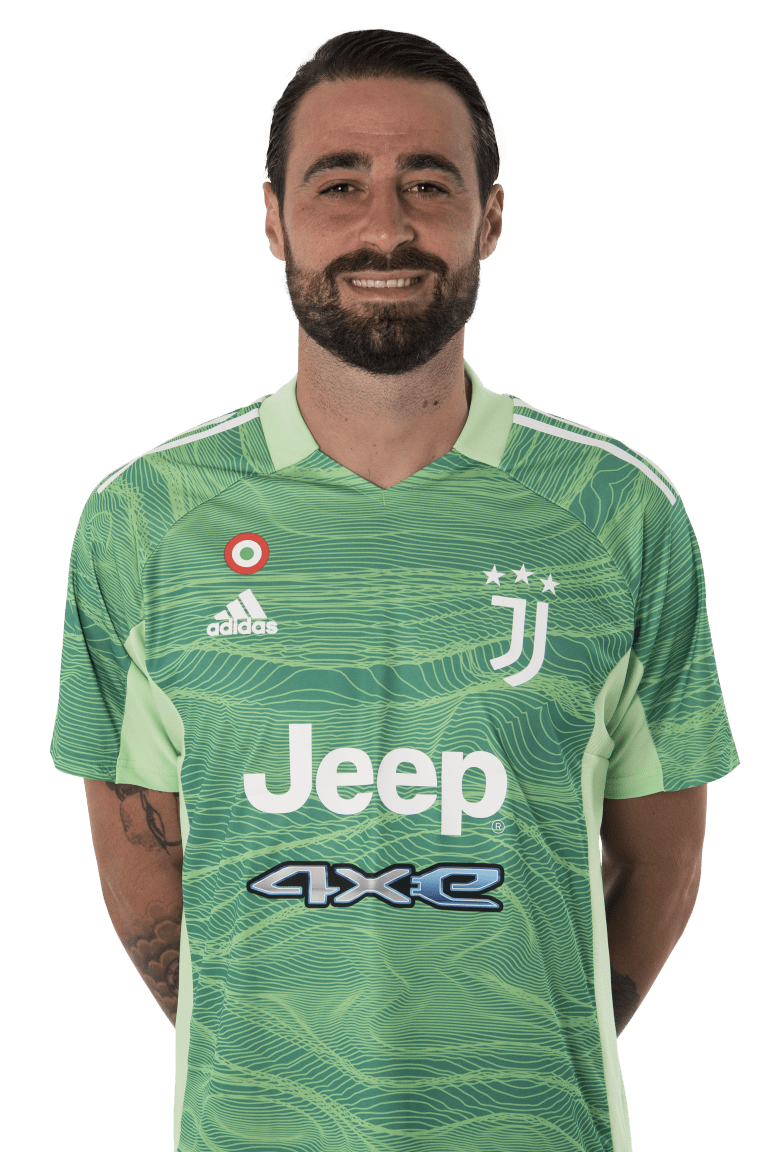

In [ ]:
r1=requests.get(members[1].select_one('img')['src'])
img = Image.open(io.BytesIO(r1.content))
img

In [ ]:
def save_img(imgfilename: str, contents):
    with open(imgfilename, 'wb') as f:
        f.write(contents)

In [ ]:
members[:2]

[<div class="jcom-player-item swiper-slide">
 <a alt="Wojciech Szczęsny" aria-label="Wojciech Szczęsny" href="/en/teams/first-team-men/squad/wojciech-szczesny" title="Wojciech Szczęsny">
 <picture class="d3-o-media-object__picture"><!--[if IE 9]><video style="display: none; "><![endif]--><source media="(min-width:1024px)" srcset="https://www.juventus.com/images/image/private/t_portrait_tablet_desktop/f_png/dev/rqbbkxbmfw56dznmhkgi.png 1x, https://www.juventus.com/images/image/private/t_portrait_tablet_desktop_2x/f_png/dev/rqbbkxbmfw56dznmhkgi.png 2x, https://www.juventus.com/images/image/private/t_portrait_tablet_desktop_3x/f_png/dev/rqbbkxbmfw56dznmhkgi.png 3x"/><source media="(min-width:768px)" srcset="https://www.juventus.com/images/image/private/t_portrait_tablet_desktop/f_png/dev/rqbbkxbmfw56dznmhkgi.png 1x, https://www.juventus.com/images/image/private/t_portrait_tablet_desktop_2x/f_png/dev/rqbbkxbmfw56dznmhkgi.png 2x, https://www.juventus.com/images/image/private/t_portrait_tabl

In [ ]:
lst=[]
# for e in members[:3]:
for e in members:
    mem_img_url=e.select_one('img')['src']
    mem_name=e.select_one('img')['alt']
    mem_number=e.select_one('div.jcom-team-entity__name').text
    mem_number=e.select_one('div.jcom-team-entity__surname ').text
    mem_number=e.select_one('div.jcom-player-info__number').text
    mem_link=f"https://www.juventus.com{e.select_one('a')['href']}"
    print(f'{mem_name} {mem_number} {mem_img_url} {mem_link}')
    lst.append([mem_name, mem_number, mem_img_url, mem_link])
#     r=requests.get(mem_img_url)
#     img = Image.open(io.BytesIO(r.content))
#     save_img(f'{mem_name}_{mem_number}.jpg', r.content)
#     img.show()
lst[:3]

Wojciech Szczęsny 1 https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/rqbbkxbmfw56dznmhkgi.png https://www.juventus.com/en/teams/first-team-men/squad/wojciech-szczesny
Carlo Pinsoglio 23 https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/zby5fu55f3xp7u3eslnm.png https://www.juventus.com/en/teams/first-team-men/squad/carlo-pinsoglio
Mattia Perin 36 https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/vggwagwljqbblw7rozkf.png https://www.juventus.com/en/teams/first-team-men/squad/mattia-perin
Mattia De Sciglio 2 https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/ij8bendycojkmwgwtiix.png https://www.juventus.com/en/teams/first-team-men/squad/mattia-de-sciglio
Giorgio Chiellini 3 https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/rylosku1xak90sejzbex.png https://www.juventus.com/en/teams/first-team-men/squad/giorgio-chiellini
Matthijs de Ligt 4 https://www.juventus.com/images/i

[['Wojciech Szczęsny',
  '1',
  'https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/rqbbkxbmfw56dznmhkgi.png',
  'https://www.juventus.com/en/teams/first-team-men/squad/wojciech-szczesny'],
 ['Carlo Pinsoglio',
  '23',
  'https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/zby5fu55f3xp7u3eslnm.png',
  'https://www.juventus.com/en/teams/first-team-men/squad/carlo-pinsoglio'],
 ['Mattia Perin',
  '36',
  'https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/vggwagwljqbblw7rozkf.png',
  'https://www.juventus.com/en/teams/first-team-men/squad/mattia-perin']]

In [ ]:
pd.options.display.max_colwidth = 0

In [ ]:
df=pd.DataFrame(lst, columns=['name', 'number', 'img_url', 'link'])
df.head()

,name,number,img_url,link
0,Wojciech Szczęsny,1,https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/rqbbkxbmfw56dznmhkgi.png,https://www.juventus.com/en/teams/first-team-men/squad/wojciech-szczesny
1,Carlo Pinsoglio,23,https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/zby5fu55f3xp7u3eslnm.png,https://www.juventus.com/en/teams/first-team-men/squad/carlo-pinsoglio
2,Mattia Perin,36,https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/vggwagwljqbblw7rozkf.png,https://www.juventus.com/en/teams/first-team-men/squad/mattia-perin
3,Mattia De Sciglio,2,https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/ij8bendycojkmwgwtiix.png,https://www.juventus.com/en/teams/first-team-men/squad/mattia-de-sciglio
4,Giorgio Chiellini,3,https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/rylosku1xak90sejzbex.png,https://www.juventus.com/en/teams/first-team-men/squad/giorgio-chiellini


In [ ]:
from IPython.display import HTML

In [ ]:
def to_html_img(url, alt=None, width=100):
    if alt==None:
        alt=''
    return f'<img alt="{alt}" src="{url}" width="{width}"/>'

In [ ]:
to_html_img('https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/rqbbkxbmfw56dznmhkgi.png')

'<img alt="" src="https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/rqbbkxbmfw56dznmhkgi.png" width="100"/>'

In [ ]:
df['img']=df.apply(lambda r: to_html_img(r['img_url'], r['name'], 100), axis=1)
df.head()

,name,number,img_url,link,img
0,Wojciech Szczęsny,1,https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/rqbbkxbmfw56dznmhkgi.png,https://www.juventus.com/en/teams/first-team-men/squad/wojciech-szczesny,"<img alt=""Wojciech Szczęsny"" src=""https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/rqbbkxbmfw56dznmhkgi.png"" width=""100""/>"
1,Carlo Pinsoglio,23,https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/zby5fu55f3xp7u3eslnm.png,https://www.juventus.com/en/teams/first-team-men/squad/carlo-pinsoglio,"<img alt=""Carlo Pinsoglio"" src=""https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/zby5fu55f3xp7u3eslnm.png"" width=""100""/>"
2,Mattia Perin,36,https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/vggwagwljqbblw7rozkf.png,https://www.juventus.com/en/teams/first-team-men/squad/mattia-perin,"<img alt=""Mattia Perin"" src=""https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/vggwagwljqbblw7rozkf.png"" width=""100""/>"
3,Mattia De Sciglio,2,https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/ij8bendycojkmwgwtiix.png,https://www.juventus.com/en/teams/first-team-men/squad/mattia-de-sciglio,"<img alt=""Mattia De Sciglio"" src=""https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/ij8bendycojkmwgwtiix.png"" width=""100""/>"
4,Giorgio Chiellini,3,https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/rylosku1xak90sejzbex.png,https://www.juventus.com/en/teams/first-team-men/squad/giorgio-chiellini,"<img alt=""Giorgio Chiellini"" src=""https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/rylosku1xak90sejzbex.png"" width=""100""/>"


In [ ]:
HTML(df[:5][['name', 'number', 'img']].to_html(escape=False))

,name,number,img
0,Wojciech Szczęsny,1,
1,Carlo Pinsoglio,23,
2,Mattia Perin,36,
3,Mattia De Sciglio,2,
4,Giorgio Chiellini,3,


In [ ]:
def to_html_a(url, text):
    if text==None:
        text=''
    return f'<a href="{url}">{text}</a>'

In [ ]:
to_html_a('https://www.juventus.com/en/teams/first-team-men/squad/wojciech-szczesny', '<img alt="" src="https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/rqbbkxbmfw56dznmhkgi.png"/>')

'<a href="https://www.juventus.com/en/teams/first-team-men/squad/wojciech-szczesny"><img alt="" src="https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/rqbbkxbmfw56dznmhkgi.png"/></a>'

In [ ]:
df.head()

,name,number,img_url,link,img
0,Wojciech Szczęsny,1,https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/rqbbkxbmfw56dznmhkgi.png,https://www.juventus.com/en/teams/first-team-men/squad/wojciech-szczesny,"<img alt=""Wojciech Szczęsny"" src=""https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/rqbbkxbmfw56dznmhkgi.png"" width=""100""/>"
1,Carlo Pinsoglio,23,https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/zby5fu55f3xp7u3eslnm.png,https://www.juventus.com/en/teams/first-team-men/squad/carlo-pinsoglio,"<img alt=""Carlo Pinsoglio"" src=""https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/zby5fu55f3xp7u3eslnm.png"" width=""100""/>"
2,Mattia Perin,36,https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/vggwagwljqbblw7rozkf.png,https://www.juventus.com/en/teams/first-team-men/squad/mattia-perin,"<img alt=""Mattia Perin"" src=""https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/vggwagwljqbblw7rozkf.png"" width=""100""/>"
3,Mattia De Sciglio,2,https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/ij8bendycojkmwgwtiix.png,https://www.juventus.com/en/teams/first-team-men/squad/mattia-de-sciglio,"<img alt=""Mattia De Sciglio"" src=""https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/ij8bendycojkmwgwtiix.png"" width=""100""/>"
4,Giorgio Chiellini,3,https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/rylosku1xak90sejzbex.png,https://www.juventus.com/en/teams/first-team-men/squad/giorgio-chiellini,"<img alt=""Giorgio Chiellini"" src=""https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/rylosku1xak90sejzbex.png"" width=""100""/>"


In [ ]:
df['a']=df.apply(lambda r: to_html_a(r['link'], r['name']), axis=1)
df.head()

,name,number,img_url,link,img,a
0,Wojciech Szczęsny,1,https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/rqbbkxbmfw56dznmhkgi.png,https://www.juventus.com/en/teams/first-team-men/squad/wojciech-szczesny,"<img alt=""Wojciech Szczęsny"" src=""https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/rqbbkxbmfw56dznmhkgi.png"" width=""100""/>","<a href=""https://www.juventus.com/en/teams/first-team-men/squad/wojciech-szczesny"">Wojciech Szczęsny</a>"
1,Carlo Pinsoglio,23,https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/zby5fu55f3xp7u3eslnm.png,https://www.juventus.com/en/teams/first-team-men/squad/carlo-pinsoglio,"<img alt=""Carlo Pinsoglio"" src=""https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/zby5fu55f3xp7u3eslnm.png"" width=""100""/>","<a href=""https://www.juventus.com/en/teams/first-team-men/squad/carlo-pinsoglio"">Carlo Pinsoglio</a>"
2,Mattia Perin,36,https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/vggwagwljqbblw7rozkf.png,https://www.juventus.com/en/teams/first-team-men/squad/mattia-perin,"<img alt=""Mattia Perin"" src=""https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/vggwagwljqbblw7rozkf.png"" width=""100""/>","<a href=""https://www.juventus.com/en/teams/first-team-men/squad/mattia-perin"">Mattia Perin</a>"
3,Mattia De Sciglio,2,https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/ij8bendycojkmwgwtiix.png,https://www.juventus.com/en/teams/first-team-men/squad/mattia-de-sciglio,"<img alt=""Mattia De Sciglio"" src=""https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/ij8bendycojkmwgwtiix.png"" width=""100""/>","<a href=""https://www.juventus.com/en/teams/first-team-men/squad/mattia-de-sciglio"">Mattia De Sciglio</a>"
4,Giorgio Chiellini,3,https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/rylosku1xak90sejzbex.png,https://www.juventus.com/en/teams/first-team-men/squad/giorgio-chiellini,"<img alt=""Giorgio Chiellini"" src=""https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/rylosku1xak90sejzbex.png"" width=""100""/>","<a href=""https://www.juventus.com/en/teams/first-team-men/squad/giorgio-chiellini"">Giorgio Chiellini</a>"


In [ ]:
HTML(df[:5][['name', 'number', 'img', 'a']].to_html(escape=False))

,name,number,img,a
0,Wojciech Szczęsny,1,,Wojciech Szczęsny
1,Carlo Pinsoglio,23,,Carlo Pinsoglio
2,Mattia Perin,36,,Mattia Perin
3,Mattia De Sciglio,2,,Mattia De Sciglio
4,Giorgio Chiellini,3,,Giorgio Chiellini


In [ ]:
df['a2']=df.apply(lambda r: to_html_a(r['link'], r['img']), axis=1)
df.head()

,name,number,img_url,link,img,a,a2
0,Wojciech Szczęsny,1,https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/rqbbkxbmfw56dznmhkgi.png,https://www.juventus.com/en/teams/first-team-men/squad/wojciech-szczesny,"<img alt=""Wojciech Szczęsny"" src=""https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/rqbbkxbmfw56dznmhkgi.png"" width=""100""/>","<a href=""https://www.juventus.com/en/teams/first-team-men/squad/wojciech-szczesny"">Wojciech Szczęsny</a>","<a href=""https://www.juventus.com/en/teams/first-team-men/squad/wojciech-szczesny""><img alt=""Wojciech Szczęsny"" src=""https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/rqbbkxbmfw56dznmhkgi.png"" width=""100""/></a>"
1,Carlo Pinsoglio,23,https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/zby5fu55f3xp7u3eslnm.png,https://www.juventus.com/en/teams/first-team-men/squad/carlo-pinsoglio,"<img alt=""Carlo Pinsoglio"" src=""https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/zby5fu55f3xp7u3eslnm.png"" width=""100""/>","<a href=""https://www.juventus.com/en/teams/first-team-men/squad/carlo-pinsoglio"">Carlo Pinsoglio</a>","<a href=""https://www.juventus.com/en/teams/first-team-men/squad/carlo-pinsoglio""><img alt=""Carlo Pinsoglio"" src=""https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/zby5fu55f3xp7u3eslnm.png"" width=""100""/></a>"
2,Mattia Perin,36,https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/vggwagwljqbblw7rozkf.png,https://www.juventus.com/en/teams/first-team-men/squad/mattia-perin,"<img alt=""Mattia Perin"" src=""https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/vggwagwljqbblw7rozkf.png"" width=""100""/>","<a href=""https://www.juventus.com/en/teams/first-team-men/squad/mattia-perin"">Mattia Perin</a>","<a href=""https://www.juventus.com/en/teams/first-team-men/squad/mattia-perin""><img alt=""Mattia Perin"" src=""https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/vggwagwljqbblw7rozkf.png"" width=""100""/></a>"
3,Mattia De Sciglio,2,https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/ij8bendycojkmwgwtiix.png,https://www.juventus.com/en/teams/first-team-men/squad/mattia-de-sciglio,"<img alt=""Mattia De Sciglio"" src=""https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/ij8bendycojkmwgwtiix.png"" width=""100""/>","<a href=""https://www.juventus.com/en/teams/first-team-men/squad/mattia-de-sciglio"">Mattia De Sciglio</a>","<a href=""https://www.juventus.com/en/teams/first-team-men/squad/mattia-de-sciglio""><img alt=""Mattia De Sciglio"" src=""https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/ij8bendycojkmwgwtiix.png"" width=""100""/></a>"
4,Giorgio Chiellini,3,https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/rylosku1xak90sejzbex.png,https://www.juventus.com/en/teams/first-team-men/squad/giorgio-chiellini,"<img alt=""Giorgio Chiellini"" src=""https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/rylosku1xak90sejzbex.png"" width=""100""/>","<a href=""https://www.juventus.com/en/teams/first-team-men/squad/giorgio-chiellini"">Giorgio Chiellini</a>","<a href=""https://www.juventus.com/en/teams/first-team-men/squad/giorgio-chiellini""><img alt=""Giorgio Chiellini"" src=""https://www.juventus.com/images/image/private/t_portrait_mobile/f_png/dev/rylosku1xak90sejzbex.png"" width=""100""/></a>"


In [ ]:
HTML(df[:5][['number', 'a', 'a2']].to_html(escape=False))

,number,a,a2
0,1,Wojciech Szczęsny,
1,23,Carlo Pinsoglio,
2,36,Mattia Perin,
3,2,Mattia De Sciglio,
4,3,Giorgio Chiellini,
